Shortest path from A to G: A -> B -> D -> G


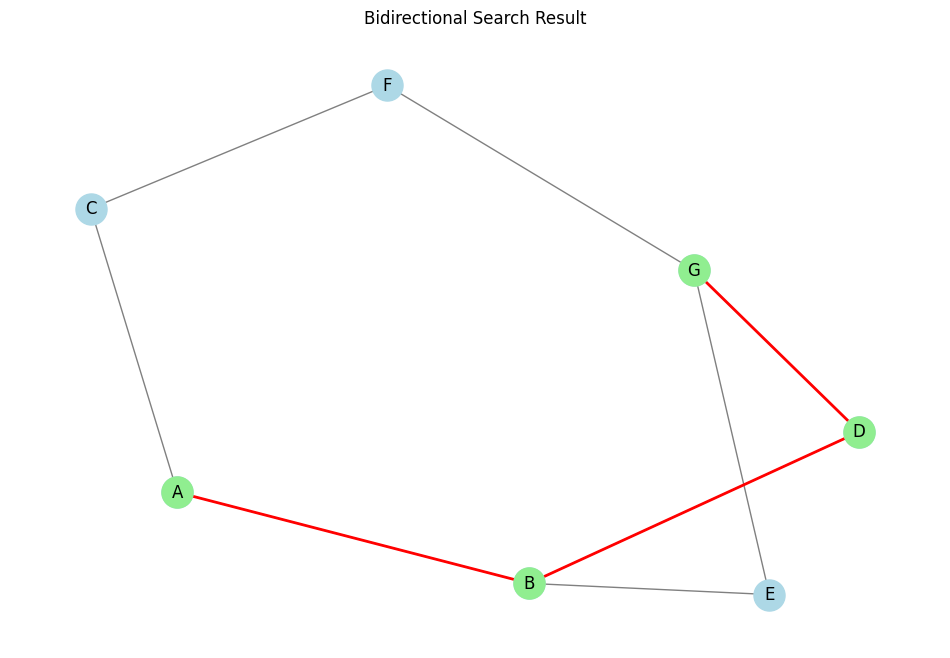

In [9]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import deque

class BidirectionalSearch:
    def __init__(self, graph):
        self.graph = graph
        self.forward_visited = set()
        self.backward_visited = set()
        self.forward_parent = {}
        self.backward_parent = {}
        
    def bfs(self, queue, visited, parent, other_visited):
        current = queue.popleft()
        
        for neighbor in self.graph[current]:
            if neighbor not in visited:
                visited.add(neighbor)
                parent[neighbor] = current
                queue.append(neighbor)
            
            if neighbor in other_visited:
                return neighbor  # Intersection point found
                
        return None
    
    def find_path(self, start, end):
        # Initialize queues for forward and backward search
        forward_queue = deque([start])
        backward_queue = deque([end])
        
        self.forward_visited.add(start)
        self.backward_visited.add(end)
        
        while forward_queue and backward_queue:
            # Forward search
            intersection = self.bfs(forward_queue, self.forward_visited, 
                                 self.forward_parent, self.backward_visited)
            if intersection:
                return self.construct_path(start, end, intersection)
            
            # Backward search
            intersection = self.bfs(backward_queue, self.backward_visited, 
                                 self.backward_parent, self.forward_visited)
            if intersection:
                return self.construct_path(start, end, intersection)
        
        return None  # No path exists
    
    def construct_path(self, start, end, intersection):
        path = []
        
        # Construct path from start to intersection
        current = intersection
        while current != start:
            path.insert(0, current)
            current = self.forward_parent[current]
        path.insert(0, start)
        
        # Construct path from intersection to end
        current = self.backward_parent[intersection]
        while current != end:
            path.append(current)
            current = self.backward_parent[current]
        path.append(end)
        
        return path

def visualize_search(G, path=None, pos=None):
    if pos is None:
        pos = nx.spring_layout(G)
    
    plt.figure(figsize=(12, 8))
    
    # Draw the graph
    nx.draw_networkx_edges(G, pos, edge_color='gray')
    nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=500)
    nx.draw_networkx_labels(G, pos)
    
    # Highlight the path if found
    if path:
        path_edges = list(zip(path[:-1], path[1:]))
        nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='r', width=2)
        nx.draw_networkx_nodes(G, pos, nodelist=path, node_color='lightgreen', node_size=500)
    
    plt.title("Bidirectional Search Result")
    plt.axis('off')
    plt.show()

# Example usage
def create_sample_graph():
    G = nx.Graph()
    # Add edges to create a sample graph
    edges = [
        ('A', 'B'), ('A', 'C'), ('B', 'D'), ('B', 'E'),
        ('C', 'F'), ('D', 'G'), ('E', 'G'), ('F', 'G')
    ]
    G.add_edges_from(edges)
    return G

# Create and visualize the graph
G = create_sample_graph()
searcher = BidirectionalSearch(nx.to_dict_of_lists(G))
start, end = 'A', 'G'
path = searcher.find_path(start, end)

if path:
    print(f"Shortest path from {start} to {end}: {' -> '.join(path)}")
    visualize_search(G, path)
else:
    print(f"No path exists between {start} and {end}")
    visualize_search(G)